# HISTORY

#### Abstract
* A Brain tumor is considered as one of the aggressive diseases, among children and adults. Brain tumors account for 85 to 90 percent of all primary Central Nervous System(CNS) tumors. Every year, around 11,700 people are diagnosed with a brain tumor. The 5-year survival rate for people with a cancerous brain or CNS tumor is approximately 34 percent for men and36 percent for women. Brain Tumors are classified as: Benign Tumor, Malignant Tumor, Pituitary Tumor, etc. Proper treatment, planning, and accurate diagnostics should be implemented to improve the life expectancy of the patients. The best technique to detect brain tumors is Magnetic Resonance Imaging (MRI). A huge amount of image data is generated through the scans. These images are examined by the radiologist. A manual examination can be error-prone due to the level of complexities involved in brain tumors and their properties.
* Application of automated classification techniques using Machine Learning(ML) and Artificial Intelligence(AI)has consistently shown higher accuracy than manual classification. Hence, proposing a system performing detection and classification by using Deep Learning Algorithms using Convolution-Neural Network (CNN), Artificial Neural Network (ANN), and Transfer-Learning (TL) would be helpful to doctors all around the world.

#### Context
* Brain Tumors are complex. There are a lot of abnormalities in the sizes and location of the brain tumor(s). This makes it really difficult for complete understanding of the nature of the tumor. Also, a professional Neurosurgeon is required for MRI analysis. Often times in developing countries the lack of skillful doctors and lack of knowledge about tumors makes it really challenging and time-consuming to generate reports from MRI’. So an automated system on Cloud can solve this problem.

#### Definition
* To Detect and Classify Brain Tumor using, CNN or ANN; as an asset of Deep Learning and to examine the tumor position(segmentation).

#### About the data:
* The dataset contains 3 folders: yes, no and pred which contains 3060 Brain MRI Images.

# PACKAGES AND LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from tensorflow import keras
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.optimizers import RMSprop,Adam
import glob
from PIL import Image
from keras.utils import plot_model


# IGNORING UNNECESSARRY WARNINGS

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

# PATH PROCESS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### TRAIN

In [ ]:
No_Data_Path = Path("/content/drive/MyDrive/Data Sets/BrainImages/no")
Yes_Data_Path = Path("/content/drive/MyDrive/Data Sets/BrainImages/yes")

In [ ]:
No_JPG_Path = list(No_Data_Path.glob(r"*.jpg"))
Yes_JPG_Path = list(Yes_Data_Path.glob(r"*.jpg"))

In [ ]:
Yes_No_List = []

for No_JPG in No_JPG_Path:
    Yes_No_List.append(No_JPG)

for Yes_JPG in Yes_JPG_Path:
    Yes_No_List.append(Yes_JPG)

print(Yes_No_List)

[PosixPath('/content/drive/MyDrive/Data Sets/BrainImages/no/no155.jpg'), PosixPath('/content/drive/MyDrive/Data Sets/BrainImages/no/no1448.jpg'), PosixPath('/content/drive/MyDrive/Data Sets/BrainImages/no/no1498.jpg'), PosixPath('/content/drive/MyDrive/Data Sets/BrainImages/no/no1463.jpg'), PosixPath('/content/drive/MyDrive/Data Sets/BrainImages/no/no1452.jpg'), PosixPath('/content/drive/MyDrive/Data Sets/BrainImages/no/no1490.jpg'), PosixPath('/content/drive/MyDrive/Data Sets/BrainImages/no/no156.jpg'), PosixPath('/content/drive/MyDrive/Data Sets/BrainImages/no/no1461.jpg'), PosixPath('/content/drive/MyDrive/Data Sets/BrainImages/no/no1441.jpg'), PosixPath('/content/drive/MyDrive/Data Sets/BrainImages/no/no1442.jpg'), PosixPath('/content/drive/MyDrive/Data Sets/BrainImages/no/no145.jpg'), PosixPath('/content/drive/MyDrive/Data Sets/BrainImages/no/no1436.jpg'), PosixPath('/content/drive/MyDrive/Data Sets/BrainImages/no/no146.jpg'), PosixPath('/content/drive/MyDrive/Data Sets/BrainImage

In [ ]:
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Yes_No_List))

In [ ]:
print(JPG_Labels[0:10])

['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']


In [ ]:
print("NO COUNTING: ", JPG_Labels.count("no"))
print("YES COUNTING: ", JPG_Labels.count("yes"))

NO COUNTING:  1500
YES COUNTING:  1510


**So from this we can say that 3010 brain images**

In [ ]:
JPG_Path_Series = pd.Series(Yes_No_List,name="JPG").astype(str)
JPG_Category_Series = pd.Series(JPG_Labels,name="TUMOR_CATEGORY")

In [ ]:
Main_Train_Data = pd.concat([JPG_Path_Series,JPG_Category_Series],axis=1)

In [ ]:
print(Main_Train_Data.head(-1))

                                                    JPG TUMOR_CATEGORY
0     /content/drive/MyDrive/Data Sets/BrainImages/n...             no
1     /content/drive/MyDrive/Data Sets/BrainImages/n...             no
2     /content/drive/MyDrive/Data Sets/BrainImages/n...             no
3     /content/drive/MyDrive/Data Sets/BrainImages/n...             no
4     /content/drive/MyDrive/Data Sets/BrainImages/n...             no
...                                                 ...            ...
3004  /content/drive/MyDrive/Data Sets/BrainImages/y...            yes
3005  /content/drive/MyDrive/Data Sets/BrainImages/y...            yes
3006  /content/drive/MyDrive/Data Sets/BrainImages/y...            yes
3007  /content/drive/MyDrive/Data Sets/BrainImages/y...            yes
3008  /content/drive/MyDrive/Data Sets/BrainImages/y...            yes

[3009 rows x 2 columns]


#### TEST

In [ ]:
Prediction_Path = Path("/content/drive/MyDrive/Data Sets/BrainImages/pred")

In [ ]:
Test_JPG_Path = list(Prediction_Path.glob(r"*.jpg"))

In [ ]:
Test_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))

In [ ]:
print(Test_JPG_Labels[0:5])

['pred', 'pred', 'pred', 'pred', 'pred']


In [ ]:
Test_JPG_Path_Series = pd.Series(Test_JPG_Path,name="JPG").astype(str)
Test_JPG_Labels_Series = pd.Series(Test_JPG_Labels,name="TUMOR_CATEGORY")

In [ ]:
Test_Data = pd.concat([Test_JPG_Path_Series,Test_JPG_Labels_Series],axis=1)

In [ ]:
print(Test_Data.head())

                                                 JPG TUMOR_CATEGORY
0  /content/drive/MyDrive/Data Sets/BrainImages/p...           pred
1  /content/drive/MyDrive/Data Sets/BrainImages/p...           pred
2  /content/drive/MyDrive/Data Sets/BrainImages/p...           pred
3  /content/drive/MyDrive/Data Sets/BrainImages/p...           pred
4  /content/drive/MyDrive/Data Sets/BrainImages/p...           pred


# SHUFFLING

It is required because if we will give continous same type images then it may preassume that we have first yes images than later no so shuffling is important

In [ ]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)

In [ ]:
print(Main_Train_Data.head(-1))

                                                    JPG TUMOR_CATEGORY
0     /content/drive/MyDrive/Data Sets/BrainImages/n...             no
1     /content/drive/MyDrive/Data Sets/BrainImages/y...            yes
2     /content/drive/MyDrive/Data Sets/BrainImages/n...             no
3     /content/drive/MyDrive/Data Sets/BrainImages/y...            yes
4     /content/drive/MyDrive/Data Sets/BrainImages/n...             no
...                                                 ...            ...
3004  /content/drive/MyDrive/Data Sets/BrainImages/y...            yes
3005  /content/drive/MyDrive/Data Sets/BrainImages/y...            yes
3006  /content/drive/MyDrive/Data Sets/BrainImages/y...            yes
3007  /content/drive/MyDrive/Data Sets/BrainImages/n...             no
3008  /content/drive/MyDrive/Data Sets/BrainImages/n...             no

[3009 rows x 2 columns]


# VISUALIZATION

Here we are selecting airbitary 2 images to see yes and no category

Text(0.5, 1.0, 'no')

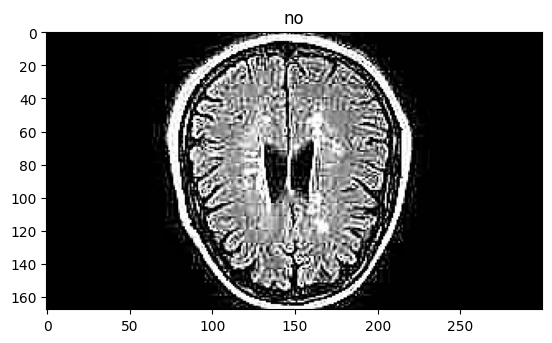

In [ ]:
figure = plt.figure()
plt.imshow(plt.imread(Main_Train_Data["JPG"][10]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][10])

Text(0.5, 1.0, 'yes')

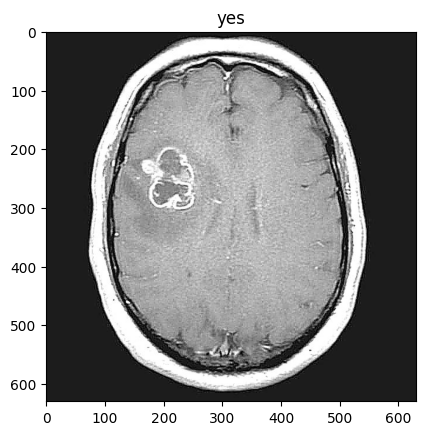

In [ ]:
figure = plt.figure()
plt.imshow(plt.imread(Main_Train_Data["JPG"][2997]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][2997])

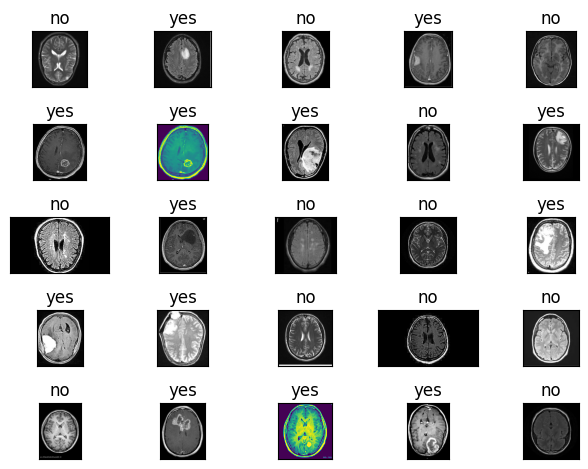

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=5, subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Train_Data["JPG"][i]))
    ax.set_title(Main_Train_Data["TUMOR_CATEGORY"][i])
plt.tight_layout()
plt.show()

# MODEL TRAINING DATA

In [ ]:
train_data,test_data = train_test_split(Main_Train_Data,train_size=0.8,random_state=42)

In [ ]:
print(train_data.shape)

(2408, 2)


In [ ]:
print(train_data.head())

                                                    JPG TUMOR_CATEGORY
1697  /content/drive/MyDrive/Data Sets/BrainImages/n...             no
1532  /content/drive/MyDrive/Data Sets/BrainImages/n...             no
2535  /content/drive/MyDrive/Data Sets/BrainImages/y...            yes
2872  /content/drive/MyDrive/Data Sets/BrainImages/n...             no
2595  /content/drive/MyDrive/Data Sets/BrainImages/n...             no


In [ ]:
print(test_data.shape)

(602, 2)


In [ ]:
print(test_data.head())

                                                    JPG TUMOR_CATEGORY
2899  /content/drive/MyDrive/Data Sets/BrainImages/n...             no
594   /content/drive/MyDrive/Data Sets/BrainImages/n...             no
2870  /content/drive/MyDrive/Data Sets/BrainImages/y...            yes
52    /content/drive/MyDrive/Data Sets/BrainImages/n...             no
1391  /content/drive/MyDrive/Data Sets/BrainImages/n...             no


# IMAGE DATA PREPROCESSING AND SPLITING

Image processing is key step in image modeling because the image data we have is not of same type means it may contain gray scale images may contain RGB images so first we need to pre-process them.

In [ ]:
Generator_Basic = ImageDataGenerator(rescale=1./255, validation_split=0.1)

In [ ]:
Train_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=100,
                                               target_size=(200,200))

Found 2168 validated image filenames belonging to 2 classes.


In [ ]:
Validation_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=100,
                                                     target_size=(200,200))

Found 240 validated image filenames belonging to 2 classes.


In [ ]:
Test_Set = Generator_Basic.flow_from_dataframe(dataframe=test_data,
                                              x_col="JPG",
                                              y_col="TUMOR_CATEGORY",
                                              color_mode="grayscale",
                                              class_mode="categorical",
                                              batch_size=100,
                                              target_size=(200,200))

Found 602 validated image filenames belonging to 2 classes.


#### CHECKING

In [ ]:
for data_batch,label_batch in Train_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (100, 200, 200, 1)
LABEL SHAPE:  (100, 2)


In [ ]:
for data_batch,label_batch in Validation_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (100, 200, 200, 1)
LABEL SHAPE:  (100, 2)


In [ ]:
for data_batch,label_batch in Test_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (100, 200, 200, 1)
LABEL SHAPE:  (100, 2)


In [ ]:
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 1, 0, 1, 1]
(200, 200, 1)


In [ ]:
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)

{'no': 0, 'yes': 1}
[0, 0, 1, 0, 0]
(200, 200, 1)


In [ ]:
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

{'no': 0, 'yes': 1}
[0, 0, 1, 0, 0]
(200, 200, 1)


# CNN MODEL

#### MODEL STRUCTURE

In [ ]:
Model = Sequential()

Model.add(Conv2D(32, (5, 5), activation="relu", input_shape=(200, 200, 1)))
Model.add(MaxPooling2D((2, 2)))
Model.add(Dropout(0.2))

Model.add(Conv2D(64, (3, 3), activation="relu"))
Model.add(MaxPooling2D((2, 2)))
Model.add(Dropout(0.2))

Model.add(Conv2D(128, (3, 3), activation="relu"))
Model.add(MaxPooling2D((2, 2)))
Model.add(Dropout(0.2))

Model.add(Conv2D(256, (3, 3), activation="relu"))
Model.add(MaxPooling2D((2, 2)))
Model.add(Dropout(0.2))

Model.add(Flatten())
Model.add(Dropout(0.5))
Model.add(Dense(128, activation="relu"))
Model.add(Dense(2, activation="softmax"))

#### MODEL COMPILE

In [ ]:
Model.compile(optimizer=RMSprop(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

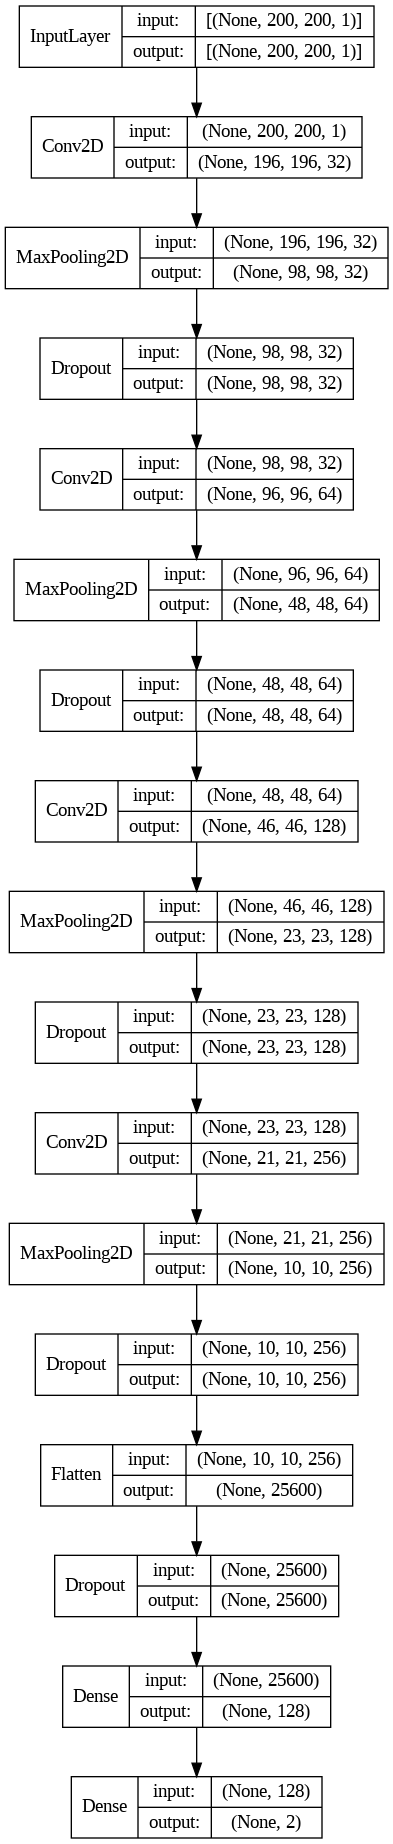

In [ ]:
plot_model(Model, show_shapes=True, show_layer_names=False)

#### MODEL FITTING

In [ ]:
ANN_Model = Model.fit(Train_Set,validation_data=Validation_Set,epochs=20)

Epoch 1/20
22/22 [==============================] - 271s 12s/step - loss: 0.7695 - accuracy: 0.5452 - val_loss: 0.6857 - val_accuracy: 0.5167
Epoch 2/20
22/22 [==============================] - 7s 299ms/step - loss: 0.6323 - accuracy: 0.6979 - val_loss: 0.4807 - val_accuracy: 0.7958
Epoch 3/20
22/22 [==============================] - 7s 291ms/step - loss: 0.5648 - accuracy: 0.7399 - val_loss: 0.4282 - val_accuracy: 0.8167
Epoch 4/20
22/22 [==============================] - 8s 348ms/step - loss: 0.4866 - accuracy: 0.7731 - val_loss: 0.4063 - val_accuracy: 0.8667
Epoch 5/20
22/22 [==============================] - 7s 291ms/step - loss: 0.4247 - accuracy: 0.8109 - val_loss: 0.3247 - val_accuracy: 0.8583
Epoch 6/20
22/22 [==============================] - 8s 338ms/step - loss: 0.3969 - accuracy: 0.8247 - val_loss: 0.2940 - val_accuracy: 0.8917
Epoch 7/20
22/22 [==============================] - 7s 295ms/step - loss: 0.3263 - accuracy: 0.8469 - val_loss: 0.2446 - val_accuracy: 0.9000
Epoch 

#### MODEL SUMMARY

In [ ]:
print(Model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 98, 98, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 98, 98, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 64)        0

#### CHECKING MODEL WITH GRAPHIC

In [ ]:
HistoryDict = ANN_Model.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)
print("Val_losses : ",val_losses)
print("Accuracy   : ",val_acc)
print("Losses     : ",losses)

Val_losses :  [0.6857044100761414, 0.4807378053665161, 0.42824873328208923, 0.4062713086605072, 0.32471948862075806, 0.294003963470459, 0.24457164108753204, 0.26889917254447937, 0.1927797645330429, 0.17792664468288422, 0.1571802794933319, 0.30183136463165283, 0.12290237098932266, 0.12329389154911041, 0.09307794272899628, 0.08262351900339127, 0.13277803361415863, 0.05245843902230263, 0.11274734884500504, 0.10605968534946442]
Accuracy   :  [0.5166666507720947, 0.7958333492279053, 0.8166666626930237, 0.8666666746139526, 0.8583333492279053, 0.8916666507720947, 0.8999999761581421, 0.9291666746139526, 0.925000011920929, 0.9333333373069763, 0.9458333253860474, 0.8833333253860474, 0.9416666626930237, 0.949999988079071, 0.9624999761581421, 0.9833333492279053, 0.949999988079071, 0.9833333492279053, 0.949999988079071, 0.9624999761581421]
Losses     :  [0.7694992423057556, 0.6323365569114685, 0.5648180842399597, 0.4866196811199188, 0.42474713921546936, 0.3968891501426697, 0.32632821798324585, 0.30

<Axes: >

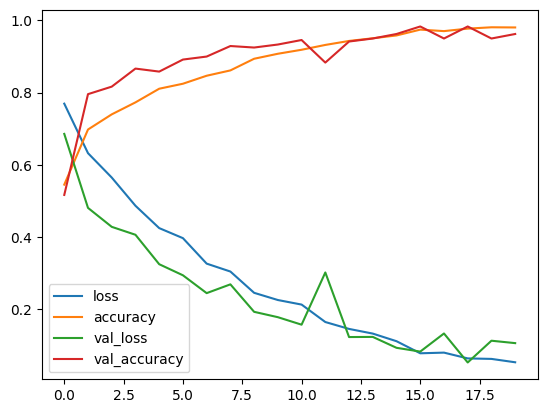

In [ ]:
Dict_Summary = pd.DataFrame(ANN_Model.history)
Dict_Summary.plot()

#### PREDICTION SCORE ON DIVIDED DATA

In [ ]:
Model_Results = Model.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f"%Model_Results[1])

LOSS:  0.1240
ACCURACY:  0.96


In [ ]:
# Evaluation on the test set
Model_Results = Model.evaluate(Test_Set, verbose=False)

# Extracting loss and accuracy from the evaluation results
loss_on_test, accuracy_on_test = Model_Results[0], Model_Results[1]

print("LOSS on test set:  " + "%.4f" % loss_on_test)
print("ACCURACY on test set:  " + "%.2f" % accuracy_on_test)

LOSS on test set:  0.1240
ACCURACY on test set:  0.96


#### PREDICTION PROCESS

In [ ]:
Main_Data_Prediction = pd.DataFrame({"JPG":Test_JPG_Path_Series})

In [ ]:
print(Main_Data_Prediction.head())

                                                 JPG
0  /content/drive/MyDrive/Data Sets/BrainImages/p...
1  /content/drive/MyDrive/Data Sets/BrainImages/p...
2  /content/drive/MyDrive/Data Sets/BrainImages/p...
3  /content/drive/MyDrive/Data Sets/BrainImages/p...
4  /content/drive/MyDrive/Data Sets/BrainImages/p...


In [ ]:
Main_Test_Generator = ImageDataGenerator(rescale=1./255)

In [ ]:
Main_Test_Set = Main_Test_Generator.flow_from_dataframe(dataframe=Main_Data_Prediction,
                                                       x_col="JPG",
                                                       y_col=None,
                                                       color_mode="grayscale",
                                                        class_mode=None,
                                                        batch_size=100,
                                                        target_size=(200,200))


Found 60 validated image filenames.


In [ ]:
Model_Test_Prediction = Model.predict(Main_Test_Set)

1/1 [==============================] - 0s 190ms/step


In [ ]:
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)

In [ ]:
print(Model_Test_Prediction)

[0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1]


In [ ]:
Last_Prediction = []
[Last_Prediction.append('Yes') if i == 1 else Last_Prediction.append('No') for i in Model_Test_Prediction]
print(Last_Prediction)

['No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes']


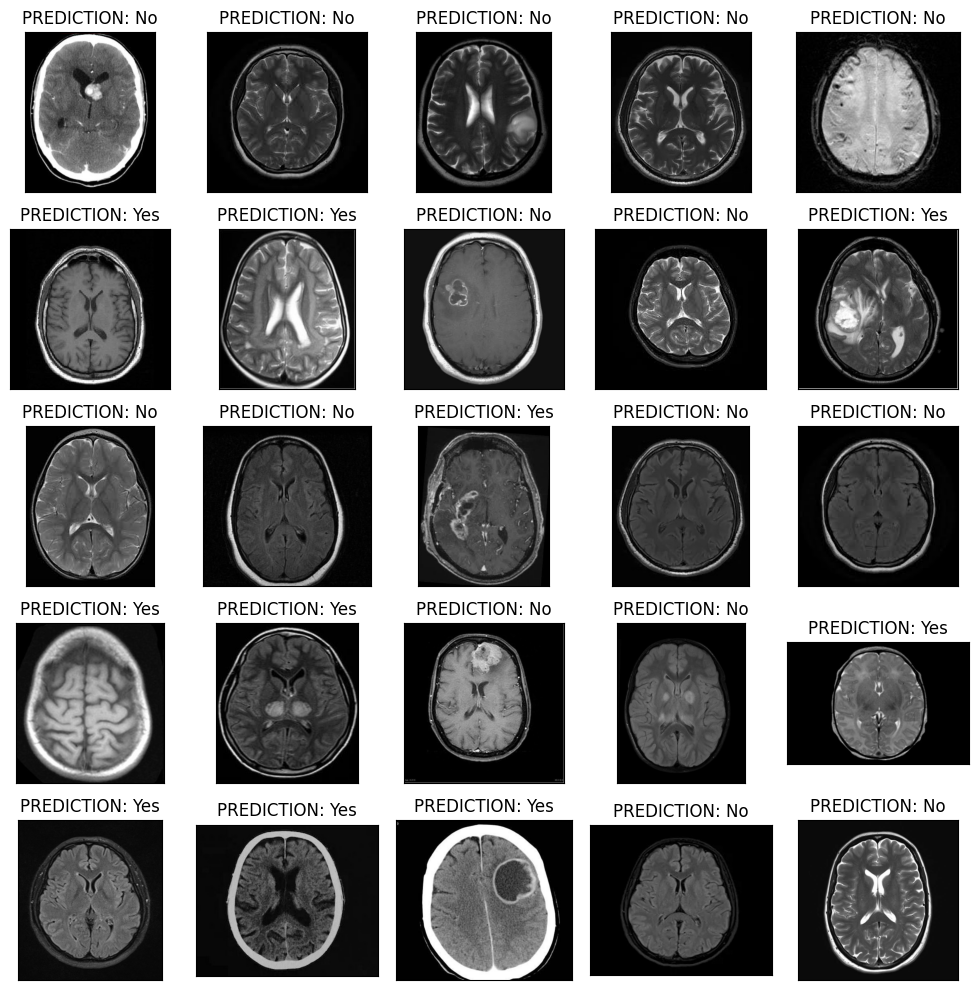

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data_Prediction["JPG"].loc[i]))
    ax.set_title(f"PREDICTION: {Last_Prediction[i]}")
plt.tight_layout()
plt.show()

In [ ]:
# Model evaluation on the test data
test_loss, test_accuracy = Model.evaluate(Model_Test_Prediction, verbose=False)

print("Test Loss: {:.4f}".format(test_loss))
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Test Loss: 0.1240
Test Accuracy: 96.18%
